# Carga de datos con pd.read


In [1]:
import pandas as pd
url = "https://raw.githubusercontent.com/joanby/python-ml-course/master/datasets/titanic/titanic3.csv"
data = pd.read_csv(url)

### ejemplo uso read.csv
read.csv(filepath="/Users/gonza/Downloads/..", sep=",",dtype={"Ingresos":np.float64,"edad":np.int32},header=0,
        names={"ingresos","edad"},skiprows=12,index_col=None, skip_blank_lines=False,na_filter=False)

In [2]:
# correlacion entre variables
import pandas as pd
url2 = "https://raw.githubusercontent.com/joanby/python-ml-course/master/datasets/ads/Advertising.csv"
data_ads = pd.read_csv(url2)
data_ads.head(3)

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3


In [8]:
# ver coorelacion entre publicidad y ventas
data_ads.corr()[["Sales"]].abs().sort_values(by="Sales", ascending=False)[1:].style.background_gradient(cmap='Oranges')

,Sales
TV,0.782224
Radio,0.576223
corr2,0.322686
Newspaper,0.228299
corr1,0.146003
corrn,0.0961527


In [4]:
    # hacemos la correlacion manual, creando una columna
    import numpy as np
    data_ads["corrn"] = (data_ads["TV"] - np.mean(data_ads["TV"])) * (data_ads["Sales"] - np.mean(data_ads["Sales"]))

In [5]:
data_ads.head(3)

,TV,Radio,Newspaper,Sales,corrn
0,230.1,37.8,69.2,22.1,670.896956
1,44.5,39.3,45.1,10.4,371.460206
2,17.2,45.9,69.3,9.3,613.181206


In [6]:
data_ads["corr1"] =   (data_ads["TV"] - np.mean(data_ads["TV"]))**2
data_ads["corr2"] = (data_ads["Sales"] - np.mean(data_ads["Sales"]))**2
data_ads.head(3)

,TV,Radio,Newspaper,Sales,corrn,corr1,corr2
0,230.1,37.8,69.2,22.1,670.896956,6898.548306,65.246006
1,44.5,39.3,45.1,10.4,371.460206,10514.964306,13.122506
2,17.2,45.9,69.3,9.3,613.181206,16859.074806,22.302006


In [7]:
coef_pearson = sum(data_ads["corrn"])/np.sqrt(sum(data_ads["corr1"]) * sum(data_ads["corr2"])) 
coef_pearson

0.782224424861606

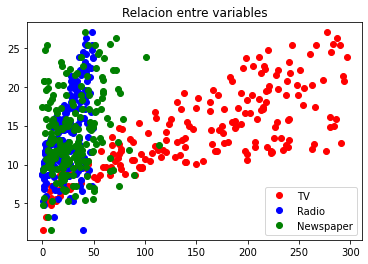

In [11]:
import matplotlib.pyplot as plt
plt.plot(data_ads["TV"],data_ads["Sales"],"ro", label="TV")
plt.plot(data_ads["Radio"],data_ads["Sales"],"bo",label="Radio")
plt.plot(data_ads["Newspaper"],data_ads["Sales"],"go",label="Newspaper")
plt.title("Relacion entre variables")
plt.legend()

In [13]:
data_ads.corr().abs().sort_values(by="Sales", ascending=False)[1:].style.background_gradient(cmap='RdPu')

,TV,Radio,Newspaper,Sales,corrn,corr1,corr2
TV,1,0.0548087,0.0566479,0.782224,0.129791,0.0787974,0.0759153
Radio,0.0548087,1,0.354104,0.576223,0.333135,0.0968838,0.402556
corr2,0.0759153,0.402556,0.142256,0.322686,0.894818,0.53624,1
Newspaper,0.0566479,0.354104,1,0.228299,0.124422,0.081003,0.142256
corr1,0.0787974,0.0968838,0.081003,0.146003,0.744287,1,0.53624
corrn,0.129791,0.333135,0.124422,0.0961527,1,0.744287,0.894818


# modelo regresion lineal
## modelo con datos simulados
* y = a + b * x
* X : 100 valores distribuidos segun una N(1.5,2.5)
* Ye = 5 + 1.9 * x + e
* estara distribuido segun N(0, 0.8)



In [14]:
x = 1.5 + 2.5 * np.random.randn(100)
res = 0 + 0.8 * np.random.randn(100)
y_pred = 5 + 1.9 * x
y_act = 5 + 1.9 * x + res

In [16]:
x_list = x.tolist()
y_pred_list = y_pred.tolist()
y_act_list = y_act.tolist()

In [18]:
dato = pd.DataFrame(
    {"x": x_list,
    "y_act": y_act_list,
    "y_pred" : y_pred_list,
    }
)

In [20]:
dato.head()

,x,y_act,y_pred
0,4.520035,13.317585,13.588067
1,0.253604,5.898588,5.481847
2,1.496319,7.720230,7.843006
3,1.248919,7.677720,7.372947
4,-1.439637,1.863895,2.264690


Text(0.5, 1.0, 'Valor actualr vs prediccion')

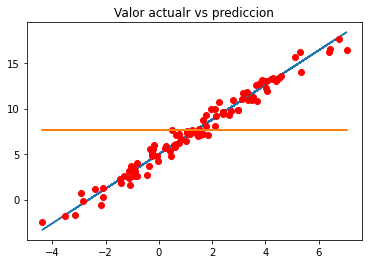

In [25]:
# pintamos los datos junto con la media
y_mean = [np.mean(y_act) for i in range(1,len(x_list) + 1)]
plt.plot(x, y_pred)
plt.plot(x, y_act,"ro")
plt.plot(x, y_mean,linestyle="-")
plt.title("Valor actualr vs prediccion")